In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [35]:


config_path = "./config_guangzhou_sensitive.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        # for inner_it in range(INNER_ITER):
        for inner_it in range(INNER_ITER):
        


            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        # if T_id % EVALU_T == 0 or T_id == model.T - 1:

        #     # we only need  this to get the running metric, otherwise we can skip this
        #     # model.inner_smooth()
            
        #     _, loss_dict = model.model_test(T_id)
        #     print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
        #      loss_dict["test_RMSE"], loss_dict["test_MAE"]))
        #     running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    print('ELAVUATION...')
    _, loss_dict = model.model_test(T=T_id, prob=True)
    fold_id=0
    print("fold = {}, after smooth: \n test_rmse= {:.3f}, \n test_MAE= {:.3f}, \n CRPS= {:.3f},\n neg-llk= {:.3f}".format(fold_id,loss_dict["test_RMSE"], loss_dict["test_MAE"],loss_dict["CRPS"], loss_dict["neg-llk"]))

    running_rmse = np.array(running_rmse)



use device: cpu


  7%|▋         | 37/500 [00:00<00:01, 362.17it/s]

100%|██████████| 500/500 [00:01<00:00, 422.05it/s]


ELAVUATION...
tensor(0.0649, dtype=torch.float64)
fold = 0, after smooth: 
 test_rmse= 4.587, 
 test_MAE= 3.194, 
 CRPS= 0.065,
 neg-llk= 2.959


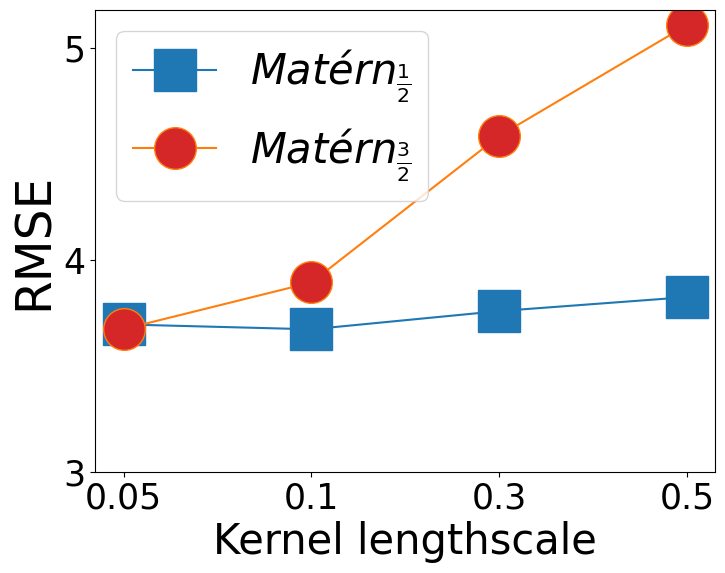

In [14]:
# RMSE over kernel-length

matern_1 = np.array([3.695,	3.672,	3.758,	3.824,])
matern_2 = np.array([3.673,	3.893,	4.585,	5.108,])

x = [0.05,0.1,0.3,0.5]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(4), x, fontsize=25)
plt.yticks([3,4,5],fontsize=25)
plt.legend(fontsize=30,loc='upper left')
plt.ylabel('RMSE',fontsize=35)
plt.xlabel('Kernel lengthscale',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_RMSE_lengthscale.pdf", bbox_inches='tight')

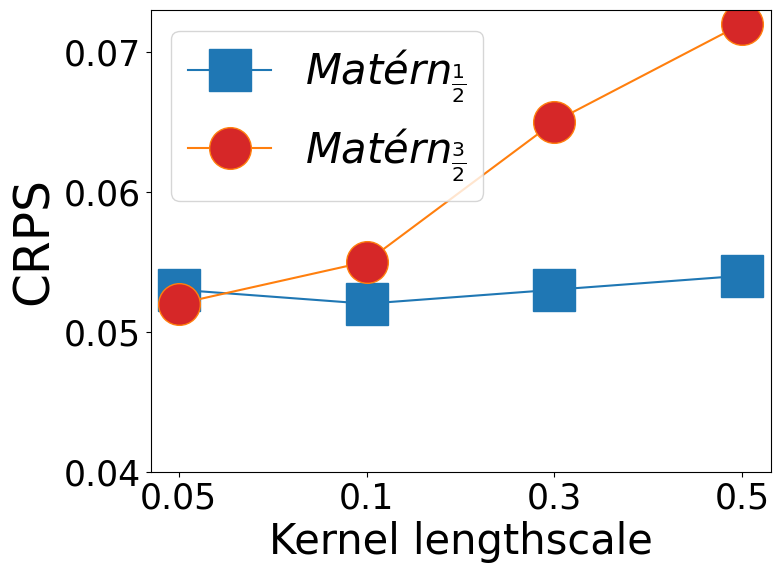

In [15]:
# CRPS over kernel-length

matern_1 = np.array([0.053,	0.052,	0.053,	0.054])
matern_2 = np.array([0.052,	0.055,	0.065,	0.072])

x = [0.05,0.1,0.3,0.5]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(4), x, fontsize=25)
# plt.yticks([0.05,0.06,0.07],fontsize=25)
plt.yticks([0.04,0.05,0.06,0.07],fontsize=25)

plt.legend(fontsize=30,loc='upper left')
plt.ylabel('CRPS',fontsize=35)
plt.xlabel('Kernel lengthscale',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_CRPS_lengthscale.pdf", bbox_inches='tight')

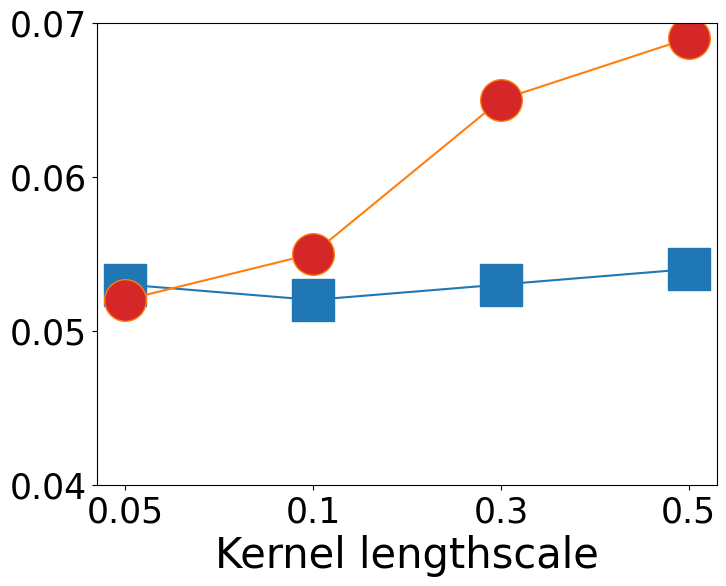

In [2]:
# CRPS over kernel-length

matern_1 = np.array([0.053,	0.052,	0.053,	0.054])
matern_2 = np.array([0.052,	0.055,	0.065,	0.069])

x = [0.05,0.1,0.3,0.5]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(4), x, fontsize=25)
# plt.yticks([0.05,0.06,0.07],fontsize=25)
plt.yticks([0.04,0.05,0.06,0.07],fontsize=25)

# plt.legend(fontsize=30,loc='upper left')
# plt.ylabel('CRPS',fontsize=35)
plt.xlabel('Kernel lengthscale',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_CRPS_lengthscale_no_legend.pdf", bbox_inches='tight')

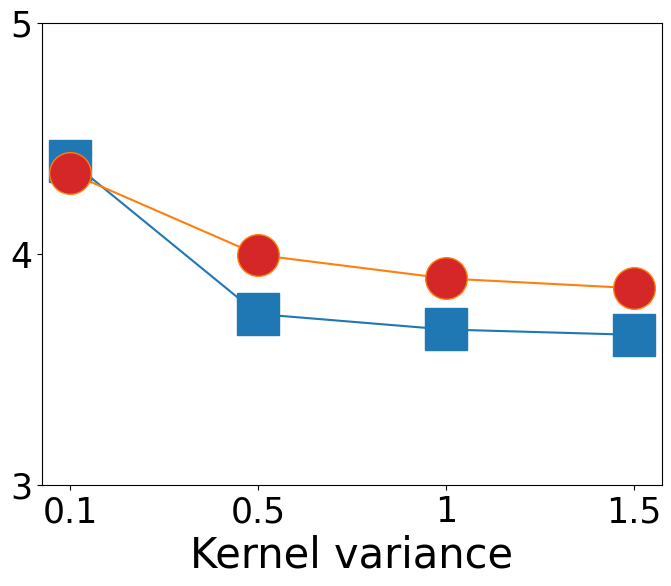

In [16]:
# RMSE over kernel-variance

matern_1 = np.array([4.403,	3.739,	3.672,	3.649,])
matern_2 = np.array([4.35,	3.995,	3.893,	3.851])

x = [0.1,0.5,1,1.5]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(4), x, fontsize=25)
# plt.yticks([3.5,4,4.5],fontsize=25)
plt.yticks([3,4, 5],fontsize=25)

# plt.legend(fontsize=30,loc='upper left')
# plt.ylabel('RMSE',fontsize=35)
plt.xlabel('Kernel variance',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_RMSE_variance.pdf", bbox_inches='tight')

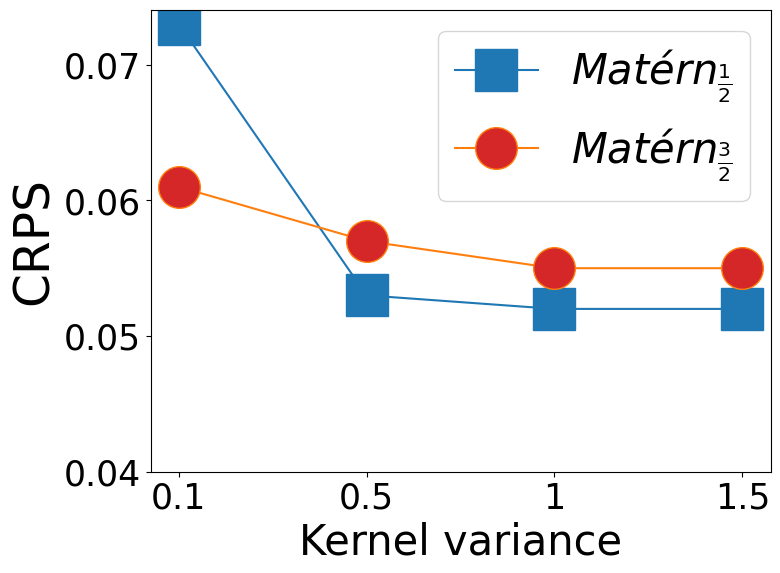

In [6]:
# RMSE over kernel-variance

matern_1 = np.array([0.073,	0.053,	0.052,	0.052])
matern_2 = np.array([0.061,	0.057,	0.055,	0.055])

x = [0.1,0.5,1,1.5]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(4), x, fontsize=25)
# plt.yticks([0.05, 0.06,0.07],fontsize=25)
plt.yticks([0.04,0.05,0.06,0.07],fontsize=25)
plt.legend(fontsize=30,loc='upper right')
plt.ylabel('CRPS',fontsize=35)
plt.xlabel('Kernel variance',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_CRPS_variance_legend.pdf", bbox_inches='tight')

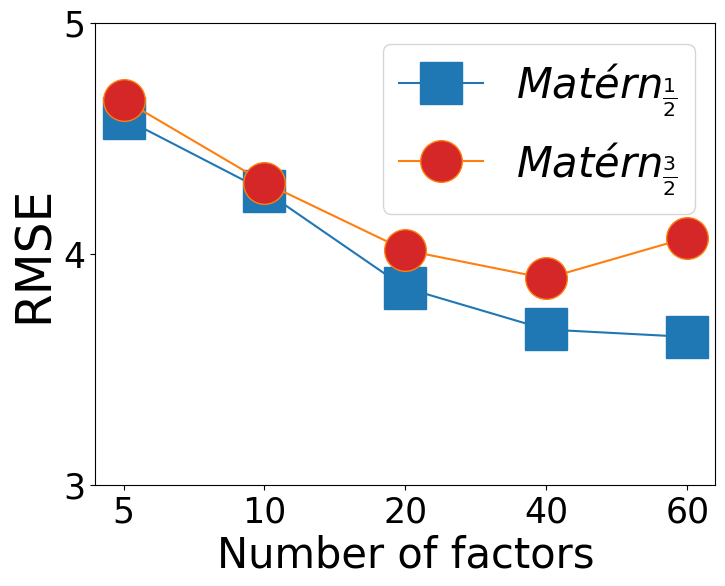

In [9]:
# RMSE over factor numbers

matern_1 = np.array([4.587,4.272,	3.852,	3.672,	3.64,])
matern_2 = np.array([4.667,4.308,	4.015,	3.893,	4.069])

x = [5,10,	20,	40,	60]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(5), x, fontsize=25)
plt.yticks([3,4, 5],fontsize=25)
plt.legend(fontsize=30,loc='upper right')
plt.ylabel('RMSE',fontsize=35)
plt.xlabel('Number of factors',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_RMSE_factor_legend.pdf", bbox_inches='tight')

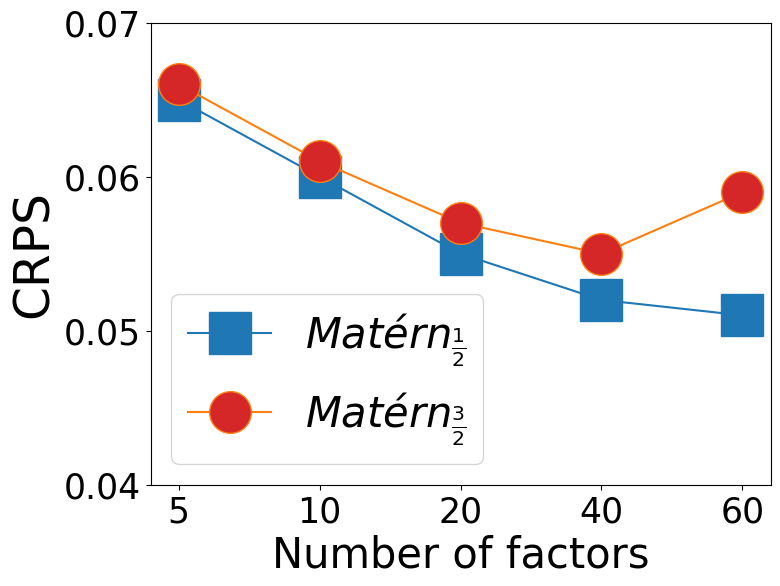

In [21]:
# RMSE over factor numbers

matern_1 = np.array([0.065, 0.06,	0.055,	0.052,	0.051,])
matern_2 = np.array([0.066, 0.061,	0.057,	0.055,	0.059])

x = [5,10,	20,	40,	60]

plt.figure(figsize=(8, 6))

plt.plot(matern_1, label=r"$Matérn_{\frac{1}{2}}$", marker='s',markersize=30)
plt.plot(matern_2, label=r"$Matérn_{\frac{3}{2}}$", marker='o',markersize=30,markerfacecolor = 'tab:red')

plt.xticks(np.arange(5), x, fontsize=25)
plt.yticks([0.04,0.05,0.06,0.07],fontsize=25)
plt.legend(fontsize=30)
plt.ylabel('CRPS',fontsize=35)
plt.xlabel('Number of factors',fontsize=30)

# save as pdf
plt.savefig("./figs/sensitive_CRPS_factor.pdf", bbox_inches='tight')